In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from scipy.spatial import distance
from copy import deepcopy

In [6]:
#Loading in data

iris = pd.read_csv("C:/Users/conno/Downloads/iris.csv")

ir0 = iris['SepalLengthCm']
ir1 = iris['SepalWidthCm']
X = np.array(list(zip(ir0, ir1)))

In [8]:
def euclid_dist(x, y, ax=1):
    """Takes in two matrices and returns the euclidean distance between them"""
    return np.linalg.norm(x - y, axis=ax)

In [9]:
def pick_rcentroids(k,data):
    """
     :param k:    Specifies the dimension of the Centriods
     :param data: Data range that guides range to pick centriods
     :return:     2 points as starting Centroids in k space
     """
    Cent_x = np.random.randint(np.min(data), np.max(data), size=k)
    Cent_y = np.random.randint(np.min(data), np.max(data), size=k)
    Centroid = np.array(list(zip(Cent_x, Cent_y)), dtype=np.float32)
    return Centroid

In [10]:
print(pick_rcentroids(3,X))

[[6. 6.]
 [2. 2.]
 [2. 4.]]


In [15]:
def k_means(k,data):
    Centroid = pick_rcentroids(k,data)
    Cent_old = np.zeros(Centroid.shape)
    clusters = np.zeros(len(data))                                                  # Creating empty list to assign data points to clusters
    error = euclid_dist(Centroid, Cent_old, None)                                   # distance between random centroids and origin
    while error > 0.01:
        sum2 = 0
        for i in range(len(data)):
            cent_distance = (euclid_dist(data[i], Centroid))                        #Calculates distance between Centroid and data point
            cent_distance2 = cent_distance**2
            sum2=sum2+cent_distance2                                                #Running total of distance of each point to Centroid
            cluster = np.argmin(cent_distance)                                      #Deciding which centroid the data point in closest to
            clusters[i] = cluster                                                   #Assigning the datapoint to the closer centroid
        Cent_old = deepcopy(Centroid)
        for i in range(k):
            points = [data[j] for j in range(len(data)) if clusters[j] == i]        #Recasting the data points belonging to each Centroid
            Centroid[i] = np.mean(points, axis=0)                                   #Calculating the new location of each centroid
        error = euclid_dist(Centroid, Cent_old, None)                               #How much the Centroids have moved this iteration
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if clusters[j] == i])  #Separating the points in each of the clusters
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])                    #plotting data points
    ax.scatter(Centroid[:, 0], Centroid[:, 1], marker='*', s=100, c='#040404')      #plotting means
    plt.title("Iris K-means")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.show()



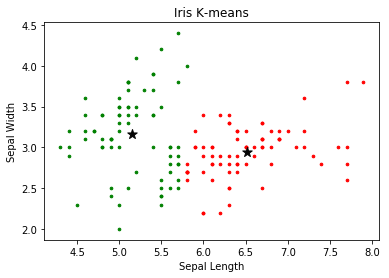

In [16]:
k_means(2,X)

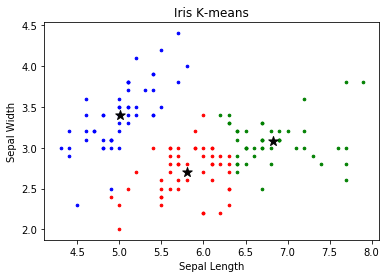

In [27]:
k_means(3, X)

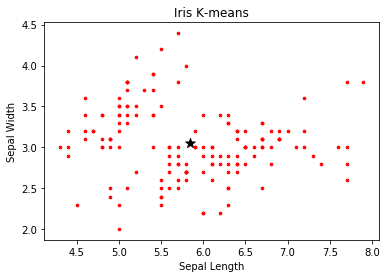

In [28]:
k_means(1, X)